In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
import os
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import datasets
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold  # 方差過濾
from sklearn.metrics import recall_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df= pd.read_csv("./All_clean_IQR.csv").drop(["Name","Sex","Country"],axis=1)
df

,Label,Eye_R_S_W,Eye_R_B_W,Eye_L_S_W,Eye_L_B_W,Eye_R_H1_W,Eye_R_H2_W,Eye_R_H3_W,Eye_R_H4_W,Eye_R_H5_W,...,face_R_widthS_L,face_L_width_L,face_L_widthS_L,Eye_to_eyebrow_L_L,eye_to_eyebrow_R_L,Nosehead_L,Forehead_w_L,nose_area,eye_R_area,eye_L_area
0,boss,0.186630,0.223305,0.182876,0.220148,0.013553,0.032178,0.047026,0.050299,0.041695,...,0.006584,0.507552,0.010848,0.069913,0.072954,0.103485,0.935589,0.149271,0.009237,0.009100
1,boss,0.200132,0.244124,0.177286,0.207472,0.015152,0.038025,0.056442,0.060386,0.050553,...,0.025190,0.288393,0.025477,0.057711,0.065030,0.086149,0.773583,0.145255,0.009582,0.008497
2,boss,0.179414,0.210726,0.192387,0.231409,0.019380,0.045778,0.066694,0.070605,0.057643,...,0.011141,0.487260,0.023674,0.050447,0.052480,0.076988,0.767872,0.161162,0.010328,0.009207
3,boss,0.175631,0.208198,0.179902,0.219480,0.024991,0.057128,0.082740,0.087278,0.069438,...,0.010561,0.333769,0.017909,0.046187,0.049003,0.051694,0.531466,0.190866,0.008599,0.009002
4,boss,0.189342,0.230542,0.180274,0.213068,0.008799,0.020458,0.030060,0.032070,0.027142,...,0.033373,0.543740,0.019484,0.056702,0.065572,0.122033,1.172724,0.120627,0.007554,0.007722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67303,sport,0.189668,0.224763,0.198537,0.235773,0.010172,0.024601,0.037045,0.040967,0.035552,...,0.004745,0.535850,0.008899,0.075036,0.080794,0.114940,0.938777,0.163385,0.007830,0.008369
67304,sport,0.194105,0.231643,0.176857,0.212704,0.012763,0.030614,0.045281,0.048855,0.041182,...,0.008964,0.513869,0.006003,0.060058,0.057974,0.107795,0.991027,0.138025,0.009976,0.007585
67305,sport,0.191906,0.226189,0.189833,0.226757,0.013453,0.031954,0.047510,0.051955,0.044398,...,0.011541,0.600640,0.016062,0.051738,0.071471,0.115522,1.017467,0.151713,0.010904,0.010422
67306,sport,0.201010,0.241555,0.181272,0.215937,0.010469,0.024807,0.036944,0.040215,0.034453,...,0.020875,0.473571,0.014753,0.058190,0.062242,0.116505,1.069344,0.124224,0.008928,0.006886


In [3]:
X=df.iloc[:,1:]
y=df["Label"]
y=y.to_list()
a=['boss', 'doctor', 'entertainer', 'ordinary_people', 'politician', 'sport']
for i in range(len(y)):
    if y[i] in a:
        b=y[i]
        y[i]=a.index(b)
y = pd.DataFrame(y)
y1=y.to_numpy()
y=y1.ravel()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_val_scaler = pd.DataFrame(scaler.transform(X_val))
X_train_scaler=pd.DataFrame(X_train_scaler)
X_train_scaler

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,-1.979032,-1.862435,-0.165258,-0.130851,0.857140,0.643928,0.475164,0.342910,0.163924,2.192634,...,-0.845308,-2.091288,-0.696136,-1.889640,-1.793743,-3.316891,-3.033529,1.640130,-1.275573,-0.328458
1,-1.224872,-1.248648,0.403358,0.696508,-0.382018,-0.517364,-0.539910,-0.576565,-0.633076,-1.534329,...,1.049670,0.949234,1.488499,1.369949,1.515933,-0.877201,-0.141583,-0.814093,-0.741373,-0.011789
2,0.120347,0.297781,-0.761019,-1.064352,1.117268,0.964962,0.935698,0.912706,0.848769,0.904664,...,0.276888,-1.292415,0.414669,0.434627,-0.307970,-0.800910,-0.521323,-0.881073,0.660301,0.045345
3,-0.328714,-0.411551,-1.009089,-1.139071,1.456254,1.501616,1.470083,1.385554,1.275767,0.161002,...,-0.386787,-0.627598,-1.217599,-0.284587,-0.743943,-0.583555,-0.303999,-0.612022,1.139629,0.273432
4,1.609801,1.415757,0.319193,0.182301,1.550007,1.630963,1.683947,1.707615,1.702371,1.075427,...,-0.111821,-0.836081,-0.168280,0.698554,-0.178948,0.049970,-0.260007,0.647275,1.818009,0.500909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,0.776236,0.610121,0.559088,0.658047,2.462618,1.943622,1.842798,1.875494,1.905904,0.071148,...,-0.941816,-0.130343,-1.457205,1.544150,1.784641,-0.891581,-0.479460,-0.416742,1.640584,1.617099
53842,0.841961,0.464506,0.553713,0.466497,0.840200,0.951639,0.996706,0.997103,0.970432,-0.557988,...,-0.702977,0.938469,-0.349156,0.444105,0.262439,0.663529,1.428054,-0.656191,1.794804,1.548175
53843,-0.246256,-0.297006,0.614554,0.719059,-0.977447,-0.971598,-0.947139,-0.925935,-0.915704,-1.678371,...,-0.193202,1.348756,-0.424425,0.843561,0.360569,1.150553,1.196132,-0.691221,-0.592886,0.053797
53844,-0.226034,0.137138,-0.258176,-0.351523,-0.070266,-0.151516,-0.179491,-0.222527,-0.272359,0.670652,...,-0.584400,-0.821489,-0.472955,1.547264,0.288581,-0.102060,-0.407625,0.243003,-0.423023,-1.099284


(53846, 32)


<AxesSubplot:>

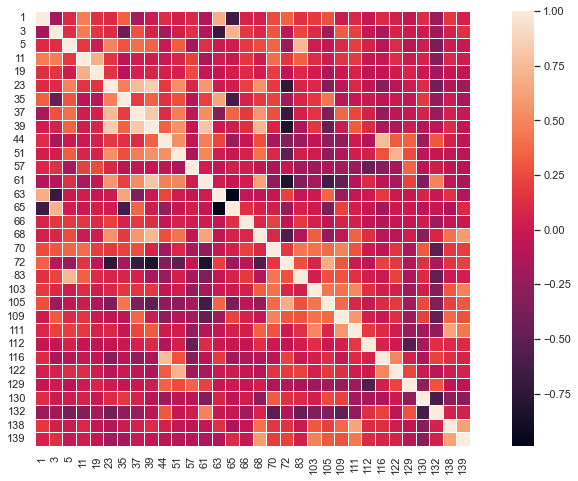

In [6]:
# corr
def find_correlation(df, thresh=0.9): # df: 量化變數資料矩陣


    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) # 取下三角矩陣

    already_in = set() # 集合結構避免重複計入相同元素
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist() # Index物件轉為list
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr)) # 更新集合
            perfect_corr.append(col)
            result.append(perfect_corr)

    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat


drop_list = find_correlation(X_train_scaler, thresh=0.75)
X_train_corr = X_train_scaler.drop(drop_list, axis=1)
print(X_train_corr.shape)


X_corr2 =X_train_corr.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X_corr2, linewidths=0.5,square=True)

In [7]:
X_val_corr = X_val_scaler.drop(drop_list, axis=1)
X_val_corr

,1,3,5,11,19,23,35,37,39,44,...,109,111,112,116,122,129,130,132,138,139
0,-2.114063,0.341759,0.336761,-0.294736,0.310535,-0.937969,-0.978910,0.185710,0.036175,-0.063414,...,-0.166814,0.324224,1.016719,1.009296,-0.071714,-0.202571,-0.724848,0.968780,-0.173595,0.363286
1,1.747907,0.529185,0.470344,1.811724,1.286571,1.616004,0.630218,0.529335,0.555180,-0.820917,...,0.928242,-0.119571,-2.087644,-1.452508,-1.016895,-0.323450,1.500855,-2.449723,-0.723097,-1.326039
2,-0.580561,-1.429295,-0.548256,-1.633937,-0.415913,-0.030856,0.931220,-0.521696,-0.093386,-0.948048,...,-0.426449,0.274306,0.786164,-0.638446,-1.164212,-1.384104,0.260803,-0.180528,0.221000,0.039763
3,0.181416,0.933475,1.491718,0.283653,-0.290120,0.202406,-0.462397,1.168493,0.578935,-1.386770,...,1.382845,0.878237,0.071251,-1.763061,-0.975176,0.994052,-0.954348,0.043566,0.336840,0.394158
4,-1.374396,0.246424,2.638708,0.108549,-0.076026,4.025037,1.110346,3.786942,4.429344,1.341829,...,-0.123264,0.299239,0.129796,-0.537276,0.274257,-0.528635,-1.074229,0.492866,-0.908064,-1.762590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,0.050153,1.956006,0.061117,1.190731,-0.206371,-1.421994,-1.582690,-0.664059,-1.826363,-1.524343,...,0.477081,-1.305091,0.935721,0.225551,1.354657,-0.118766,1.014367,-0.378700,-2.684739,0.952883
13458,-0.382646,2.548522,0.106915,2.332126,1.665337,0.482597,-0.068757,0.983242,0.494683,-0.703755,...,1.088745,0.214916,1.970444,-0.452566,-0.577396,-0.959009,0.038891,-0.380624,0.527013,-0.371142
13459,-0.974042,0.624597,1.797920,0.665670,1.399414,1.274571,0.490492,1.587218,0.967014,-1.017438,...,1.396960,0.459514,-0.789127,-1.720898,-0.186280,0.190100,1.465783,-1.711843,-0.691130,-0.802421
13460,0.608674,-0.973903,-0.138853,-0.333555,-0.135175,-2.242950,0.417122,-1.867767,-2.254902,0.177115,...,0.680783,0.184377,0.671347,2.430990,0.358259,-0.311181,-0.004142,0.415442,-0.019436,-0.171917


[0.79915525 0.13913582 0.04045756 0.01954702 0.00170434]


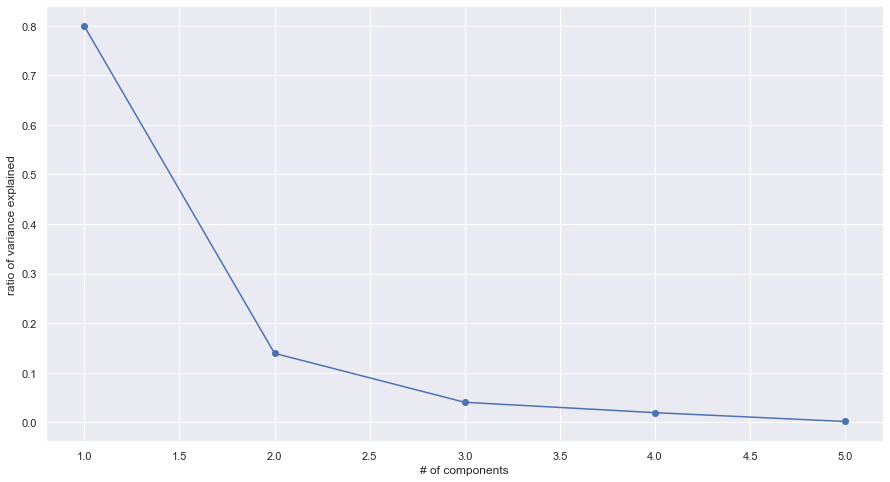

In [8]:
dr = LDA() # Principal Components Analysis 主成份分析，透過矩陣分解decomposition，預設會提取出min(n_samples, n_features)=58主成份，可改成PCA(n_components = 20)

# Step 3&4
# 分數矩陣cell_pca (cell_num 舊空間 -轉軸-> cell_pca 新空間)
X_train_lda = dr.fit_transform(X_train_corr,y_train) # PCA只能針對量化變數計算


# 負荷矩陣
# 前十個主成份與58個原始變數的(線性組合)關係
# dr.components_[:10] # [:10] can be removed.
# type(dr.components_) # numpy.ndarray
# dr.components_.shape # (58主成份, 58原始變量)的方陣

# 陡坡圖(scree plot)決定取幾個主成份
dr.explained_variance_ratio_
print(dr.explained_variance_ratio_)

plt.plot(range(1, 6), dr.explained_variance_ratio_[:5], '-o')
plt.xlabel('# of components')
plt.ylabel('ratio of variance explained')


# 取前7個
dr = LDA(n_components=5)
X_train_lda = dr.fit_transform(X_train_corr,y_train)
X_val_lda=dr.transform(X_val_corr)

In [9]:
model = SVC(kernel='linear', C=1.5)

In [10]:
scores = cross_val_score(model, X_train_lda, y_train, cv=5, scoring='recall_macro')
print(scores)

print("Accuracy: {} (+/- {})".format(scores.mean(), scores.std() * 2))

[0.67883381 0.6931502  0.70330569 0.69857841 0.69538131]
Accuracy: 0.6938498807178569 (+/- 0.016494570561385542)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lda, y_train, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
recall_w = recall_score(y_test, y_pred,average="macro")
recall_N = recall_score(y_test, y_pred,average=None)


# print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))
print(f"recall:{recall_w}")
print(f"recall:{recall_N}")

accuracy: 0.954410399257196
con_matrix: 
[[ 437   19   86  105   30    3]
 [  25   71   25    1   25    2]
 [  35   12  804    0   17    2]
 [   2    0    0 8789    0    1]
 [  21   20   33    0   84    0]
 [   3    4   15    1    4   94]]
recall:0.7252431519057211
recall:[0.64264706 0.47651007 0.92413793 0.99965878 0.53164557 0.7768595 ]


In [12]:
y_pred1 = model.predict(X_val_lda)
con_matrix = confusion_matrix(y_val, y_pred1)
recall_w = recall_score(y_val, y_pred1,average="macro")
print('con_matrix: {}'.format(con_matrix))
print(f"recall:{recall_w}")

con_matrix: [[  527    28   101   116    33     6]
 [   32    92    35     3    27     1]
 [   37    23   978     1    24     5]
 [    4     0     0 11016     0     2]
 [   38    39    51     0    88     0]
 [    5     3    28     1     4   114]]
recall:0.6986838031853934
